<a href="https://colab.research.google.com/github/mohamedghaly1/Emotion-Classification-from-Movie-Frames/blob/main/Emotion_Classification_from_Movie_Frames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data and Necessary Libraries

Connecting to google drive to access the dataset

In [ ]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Unzipping the dataset folder to access the zip classes

In [ ]:
!unzip /content/drive/MyDrive/DLCV_SS25_Dataset.zip

Archive:  /content/drive/MyDrive/DLCV_SS25_Dataset.zip
 extracting: Angry.zip               
 extracting: Happy.zip               
 extracting: Neutral.zip             
 extracting: Sad.zip                 
 extracting: Surprised.zip           


Unzipping the classes files and putting them in different folders

In [ ]:
!unzip /content/Angry.zip
!unzip /content/Happy.zip
!unzip /content/Neutral.zip
!unzip /content/Sad.zip

Archive:  /content/Angry.zip
  inflating: Angry/ANGRY_02_0000.png  
  inflating: Angry/ANGRY_02_0001.png  
  inflating: Angry/ANGRY_02_0002.png  
  inflating: Angry/ANGRY_02_0003.png  
  inflating: Angry/ANGRY_02_0004.png  
  inflating: Angry/ANGRY_02_0005.png  
  inflating: Angry/ANGRY_02_0006.png  
  inflating: Angry/ANGRY_02_0007.png  
  inflating: Angry/ANGRY_02_0008.png  
  inflating: Angry/ANGRY_02_0009.png  
  inflating: Angry/ANGRY_02_0010.png  
  inflating: Angry/ANGRY_02_0011.png  
  inflating: Angry/ANGRY_02_0012.png  
  inflating: Angry/ANGRY_02_0013.png  
  inflating: Angry/ANGRY_02_0014.png  
  inflating: Angry/ANGRY_02_0015.png  
  inflating: Angry/ANGRY_02_0016.png  
  inflating: Angry/ANGRY_02_0017.png  
  inflating: Angry/ANGRY_02_0018.png  
  inflating: Angry/ANGRY_02_0019.png  
  inflating: Angry/ANGRY_02_0020.png  
  inflating: Angry/ANGRY_02_0021.png  
  inflating: Angry/ANGRY_02_0022.png  
  inflating: Angry/ANGRY_02_0023.png  
  inflating: Angry/ANGRY_02_0024.pn

# Data Preperation

Importing libraries used in the Data Preperation part

In [ ]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import shutil
import numpy as np
import random
import hashlib

Combining all the emtions folders into one folder for ease of use

In [ ]:
!mkdir -p /content/emotions_combined
!mv /content/Angry /content/Sad /content/Happy /content/Neutral /content/emotions_combined/

**Data Augmentation**



*   Took 25 Images from each emotion class
*   Each 5 images in the 25 images we took we did
    1.   Rotation by 90 degres
    2.   Rotation by 180 degres
    3.   Rotation by 270 degres
    4.   Random Cropping
    5.   Flipping

In [ ]:
def augment_image(image, target_size=(512, 512)):
    rotated_images = [image.rotate(90), image.rotate(180), image.rotate(270)]

    # Random Crop
    left = random.randint(0, image.width // 4)
    top = random.randint(0, image.height // 4)
    right = image.width - random.randint(0, image.width // 4)
    bottom = image.height - random.randint(0, image.height // 4)
    cropped_image = image.crop((left, top, right, bottom)).resize(target_size)

    # Flip the image
    flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)

    return rotated_images + [cropped_image, flipped_image]

# Function to augment and save images
def save_augmented_images(source_folder, num_images=5):
    all_images = os.listdir(source_folder)
    random.shuffle(all_images)

    augmented_images = []
    for img_name in all_images[:num_images]:
        img_path = os.path.join(source_folder, img_name)
        img = Image.open(img_path).convert("RGB")

        augmented = augment_image(img)

        # Save the augmented images
        for i, aug_img in enumerate(augmented):
            augmented_img_name = f"{os.path.splitext(img_name)[0]}_aug_{i}.jpg"
            augmented_img_path = os.path.join(source_folder, augmented_img_name)
            aug_img.save(augmented_img_path)

Adding augmented images into the dataset

In [ ]:
emotions_dir = "/content/emotions_combined"

for emotion in os.listdir(emotions_dir):
    emotion_folder = os.path.join(emotions_dir, emotion)
    save_augmented_images(emotion_folder)

for emotion in os.listdir(emotions_dir):
    emotion_folder = os.path.join(emotions_dir, emotion)
    print(f"{emotion}: {len(os.listdir(emotion_folder))} images after augmentation")

Happy: 644 images after augmentation
Angry: 679 images after augmentation
Neutral: 322 images after augmentation
Sad: 580 images after augmentation


Removing redundant images from our dataset

In [ ]:
def remove_redundant(root='/content/emotions_combined', subdirs=['Angry','Happy','Neutral','Sad']):
    seen = set()
    for d in subdirs:
        folder = os.path.join(root, d)
        # Check if the folder exists before processing it
        if os.path.exists(folder):
            for f in os.listdir(folder):
                if f.lower().endswith(('.jpg','.jpeg','.png','.bmp','.gif')):
                    path = os.path.join(folder, f)
                    with open(path, 'rb') as img:
                        h = hashlib.md5(img.read()).hexdigest()
                    if h in seen:
                        os.remove(path)
                    else:
                        seen.add(h)
        else:
            print(f"Warning: Folder {folder} does not exist.")

remove_redundant()

Resizing the images to a 512x512 images, normalizing them, and changing the images into a default RGB format

In [ ]:
def resize_images(source_folder, target_size=(512, 512)):
    for img_name in os.listdir(source_folder):
        img_path = os.path.join(source_folder, img_name)
        if img_path.lower().endswith(('.jpg','.jpeg','.png','.bmp','.gif')):
            img = Image.open(img_path).convert("RGB")
            img_resized = img.resize(target_size)
            img_resized.save(img_path)

# resizing
for emotion in os.listdir(emotions_dir):
    emotion_folder = os.path.join(emotions_dir, emotion)
    resize_images(emotion_folder)

Splitting the dataset into 70% training, 20% validation, and 10% testing data.

In [ ]:
emotions_dir = "/content/emotions_combined"
split_dir = "/content/emotions_split"
splits = ['train', 'val', 'test']

for split in splits:
    os.makedirs(os.path.join(split_dir, split), exist_ok=True)

for split in splits:
    for emotion in os.listdir(emotions_dir):
        os.makedirs(os.path.join(split_dir, split, emotion), exist_ok=True)

ratios = [0.7, 0.2, 0.1]
for emotion in os.listdir(emotions_dir):
    emotion_path = os.path.join(emotions_dir, emotion)
    all_imgs = os.listdir(emotion_path)
    random.shuffle(all_imgs)

    n = len(all_imgs)
    n_train = int(n * ratios[0])
    n_val = int(n * ratios[1])

    for i, img_name in enumerate(all_imgs):
        src = os.path.join(emotion_path, img_name)
        if i < n_train:
            dst = os.path.join(split_dir, "train", emotion, img_name)
        elif i < n_train + n_val:
            dst = os.path.join(split_dir, "val", emotion, img_name)
        else:
            dst = os.path.join(split_dir, "test", emotion, img_name)
        shutil.copy(src, dst)

for split in splits:
    for emotion in os.listdir(os.path.join(split_dir, split)):
        path = os.path.join(split_dir, split, emotion)
        print(f"{split}/{emotion}: {len(os.listdir(path))} images")

train/Happy: 450 images
train/Angry: 474 images
train/Neutral: 224 images
train/Sad: 405 images
val/Happy: 128 images
val/Angry: 135 images
val/Neutral: 64 images
val/Sad: 115 images
test/Happy: 66 images
test/Angry: 69 images
test/Neutral: 33 images
test/Sad: 59 images


For more efficient training, we combined the images into batches

In [ ]:
import tensorflow as tf

base_dir = "/content/emotions_split"
img_size = (512, 512)
batch_size = 16

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir + "/train",
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir + "/val",
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir + "/test",
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'
)

Found 1553 files belonging to 4 classes.
Found 442 files belonging to 4 classes.
Found 227 files belonging to 4 classes.


Normalizing the dataset and outputting the number of batches of each of the train, val, test datasets.

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Output the number of images in each dataset
print(f"Train dataset size: {len(train_ds)} batches")
print(f"Validation dataset size: {len(val_ds)} batches")
print(f"Test dataset size: {len(test_ds)} batches")

Train dataset size: 98 batches
Validation dataset size: 28 batches
Test dataset size: 15 batches


# Part 1 (From Scratch)

Define a Convolution Layer Class: Builds a basic convolutional layer that applies filters to input images.

In [ ]:
class ConvLayer:
    def __init__(self, num_filters, filter_size, filters=None, input_depth=3):
        self.num_filters = num_filters
        self.filter_size = filter_size

        if filters is not None:
            self.filters = filters
            self.input_depth = filters.shape[3]
        else:
            self.filters = np.random.randn(num_filters, filter_size, filter_size, input_depth)
            self.input_depth = input_depth


    def iterate_regions(self, image):
        h, w, _ = image.shape
        for i in range(h - self.filter_size + 1):
            for j in range(w - self.filter_size + 1):
                yield i, j, image[i:i+self.filter_size, j:j+self.filter_size, :]

    def forward(self, image):
        h, w, _ = image.shape
        output = np.zeros((h - self.filter_size + 1, w - self.filter_size + 1, self.num_filters))
        for f in range(self.num_filters):
            filt = self.filters[f]
            for i, j, region in self.iterate_regions(image):
                output[i, j, f] = np.sum(region * filt)
        return output

Define a Pooling Layer Class: Implements max-pooling or average-pooling to downsample feature maps.

In [ ]:
class PoolingLayer:
    def __init__(self, size=2, mode='max'):
        self.size = size
        self.mode = mode

    def forward(self, input_image):
        h, w, d = input_image.shape
        output = np.zeros((h // self.size, w // self.size, d))
        for k in range(d):
            for i in range(0, h, self.size):
                for j in range(0, w, self.size):
                    region = input_image[i:i+self.size, j:j+self.size, k]
                    if region.shape == (self.size, self.size):
                        if self.mode == 'max':
                            output[i//self.size, j//self.size, k] = np.max(region)
                        else:
                            output[i//self.size, j//self.size, k] = np.mean(region)
        return output

Define a Simple Activation Function (ReLU)

In [ ]:
def simple_activation(x):
    return np.maximum(0, x)

Create Predefined Filters for Convolution

In [ ]:
def create_predefined_filters():
    filters = [
        np.array([[1, 1, 1],
                  [1, 1, 1],
                  [1, 1, 1]]),

        np.array([[0, 0, 0],
                  [0, 1, 0],
                  [0, 0, 0]]),

        np.array([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]]),

        np.array([[-1, -2, -1],
                  [ 0,  0,  0],
                  [ 1,  2,  1]]),

        np.array([[0, -1, 0],
                  [-1, 5, -1],
                  [0, -1, 0]])
    ]

    # Expand each 2D filter to 3D by copying into 3 channels
    filters_3d = np.stack([np.repeat(f[:, :, np.newaxis], 3, axis=2) for f in filters])

    return filters_3d

Run a Custom CNN Pipeline for Feature Extraction: Passes an image through three convolutional and pooling layers, and flattens the result for feature extraction.

In [ ]:
def run_custom_cnn(img):
    filters = create_predefined_filters()  #(5, 3, 3, 3)

    #Block 1
    conv1 = ConvLayer(5, 3, filters=filters)
    out1 = conv1.forward(img)
    pool1 = PoolingLayer()
    out1_pooled = pool1.forward(simple_activation(out1))

    #Block 2
    conv2 = ConvLayer(5, 3, input_depth=out1_pooled.shape[2])
    out2 = conv2.forward(out1_pooled)
    pool2 = PoolingLayer()
    out2_pooled = pool2.forward(simple_activation(out2))

    #Block 3
    conv3 = ConvLayer(5, 3, input_depth=out2_pooled.shape[2])
    out3 = conv3.forward(out2_pooled)
    pool3 = PoolingLayer()
    out3_pooled = pool3.forward(simple_activation(out3))

    #Flatten the output
    flat = out3_pooled.flatten()
    return flat[:128]

Print the Number of Batches in the Training Dataset

In [ ]:
num_batches = len(train_ds)
print(f"Number of batches in the training dataset: {num_batches}")


Number of batches in the training dataset: 98


Define a Function to Extract Features, and True Labels from Dataset. Processes each batch of images, applies the custom CNN, and collects the extracted features and corresponding labels. Apply K-Means Clustering on Extracted Features

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

def extract_features(dataset):
    features = []
    labels = []
    batch_count = 0
    for img_batch, label_batch in dataset:
        batch_count += 1
        print(f"Processing batch {batch_count} with shape: {img_batch.shape}")
        img_batch = img_batch.numpy()  # Convert batch tensor to numpy
        for img, label in zip(img_batch, label_batch):
            img = tf.image.resize(img).numpy()  # Resize inside here
            feature = run_custom_cnn(img)
            features.append(feature)
            labels.append(label.numpy())
    return np.array(features), np.array(labels)

train_features, true_labels = extract_features(train_ds)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(train_features)
predicted_labels = kmeans.labels_

# Get the labels assigned by k-means
labels = kmeans.labels_

# Output the labels for the images
print(labels)

Processing batch 1 with shape: (16, 512, 512, 3)
Processing batch 2 with shape: (16, 512, 512, 3)
Processing batch 3 with shape: (16, 512, 512, 3)
Processing batch 4 with shape: (16, 512, 512, 3)
Processing batch 5 with shape: (16, 512, 512, 3)
Processing batch 6 with shape: (16, 512, 512, 3)
Processing batch 7 with shape: (16, 512, 512, 3)
Processing batch 8 with shape: (16, 512, 512, 3)
Processing batch 9 with shape: (16, 512, 512, 3)
Processing batch 10 with shape: (16, 512, 512, 3)
Processing batch 11 with shape: (16, 512, 512, 3)
Processing batch 12 with shape: (16, 512, 512, 3)
Processing batch 13 with shape: (16, 512, 512, 3)
Processing batch 14 with shape: (16, 512, 512, 3)
Processing batch 15 with shape: (16, 512, 512, 3)
Processing batch 16 with shape: (16, 512, 512, 3)
Processing batch 17 with shape: (16, 512, 512, 3)
Processing batch 18 with shape: (16, 512, 512, 3)
Processing batch 19 with shape: (16, 512, 512, 3)
Processing batch 20 with shape: (16, 512, 512, 3)
Processin

Evaluate the Clustering Results (ARI and NMI)

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(true_labels, predicted_labels)
nmi = normalized_mutual_info_score(true_labels, predicted_labels)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

Adjusted Rand Index (ARI): -0.0035
Normalized Mutual Information (NMI): 0.0062


Visualize the K-Means Clusters:  Plots a 2D scatter plot of the clustered feature points.

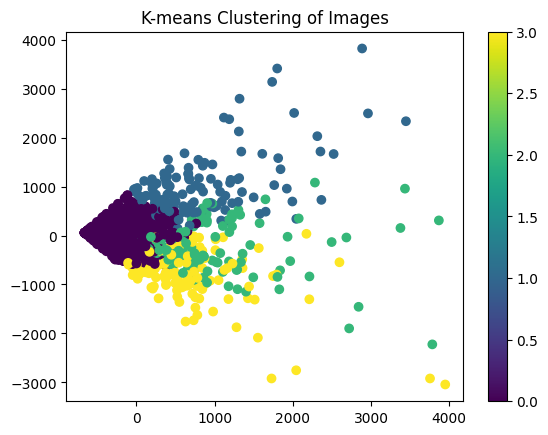

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce the features to 2D for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(train_features)

# Plot the clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis')
plt.colorbar()  # Show the color bar to indicate the cluster labels
plt.title('K-means Clustering of Images')
plt.show()

Show Cluster Distribution (How Many Images per Cluster)

In [ ]:
import numpy as np

unique, counts = np.unique(labels, return_counts=True)
print("Cluster distribution:")
for label, count in zip(unique, counts):
    print(f"Cluster {label}: {count} samples")

Cluster distribution:
Cluster 0: 1146 samples
Cluster 1: 130 samples
Cluster 2: 138 samples
Cluster 3: 139 samples


# Part 2 (Using Libraries)

In [ ]:
import os
import cv2
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, BatchNormalization,
                                     Flatten, Dense, Dropout)

## Model Implementation

Define the CNN Model Architecture

In [ ]:
import tensorflow as tf

l2 = regularizers.l2(1e-4) #le-4 is the default

model = Sequential([
    #Bloack 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3), kernel_regularizer=l2),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    #Bloack 2
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    #Bloack 3
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    #Bloack 4
    Conv2D(32, (5, 5), activation='relu', kernel_regularizer=l2),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    #Bloack 5
    Conv2D(16, (7, 7), activation='relu', kernel_regularizer=l2),
    MaxPooling2D(pool_size=(2, 2)),

    #Adding the dropout to decrease the overfitting
    Dropout(0.30),
    Flatten(),

    Dense(64, activation='sigmoid'),   # Hidden fully connected layer
    Dense(4, activation='softmax')     # 4 classes: happy, sad, angry, neutral
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compiles the model using Adam optimizer and sparse categorical cross-entropy loss for multi-class classification.

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Prints a detailed summary of the model's layers, output shapes, and number of trainable parameters.

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 510, 510, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 255, 255, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 255, 255, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 253, 253, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 126, 126, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 62, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 58, 58, 32)     │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 23, 23, 16)     │        25,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 11, 11, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1936)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       123,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,652 (1006.45 KB)

 Trainable params: 257,268 (1004.95 KB)

 Non-trainable params: 384 (1.50 KB)

## Splitting and Testing

Trains the model using the training dataset and evaluates on the validation dataset for 20 epochs.

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 168ms/step - accuracy: 0.4038 - loss: 1.2866 - val_accuracy: 0.3303 - val_loss: 1.3860
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 142ms/step - accuracy: 0.4068 - loss: 1.2807 - val_accuracy: 0.3507 - val_loss: 1.3753
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 144ms/step - accuracy: 0.4287 - loss: 1.2782 - val_accuracy: 0.3326 - val_loss: 1.4040
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - accuracy: 0.4078 - loss: 1.2789 - val_accuracy: 0.3575 - val_loss: 1.3606
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - accuracy: 0.3949 - loss: 1.2762 - val_accuracy: 0.2851 - val_loss: 1.4343
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 150ms/step - accuracy: 0.4331 - loss: 1.2634 - val_accuracy: 0.3235 - val_loss: 1.4860
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - accuracy: 0.4301 - loss: 1.2589 - val_accuracy: 0.3688 - val_loss: 1.3394
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 143ms/step - accuracy: 0.4137 - loss: 1.2663 - val_accu

Evaluates the final trained model performance on the unseen test dataset.

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test accuracy:", test_acc)

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - accuracy: 0.3956 - loss: 1.2904
Test accuracy: 0.40528634190559387


Visualizes model performance by plotting training/validation accuracy and loss curves over epochs.

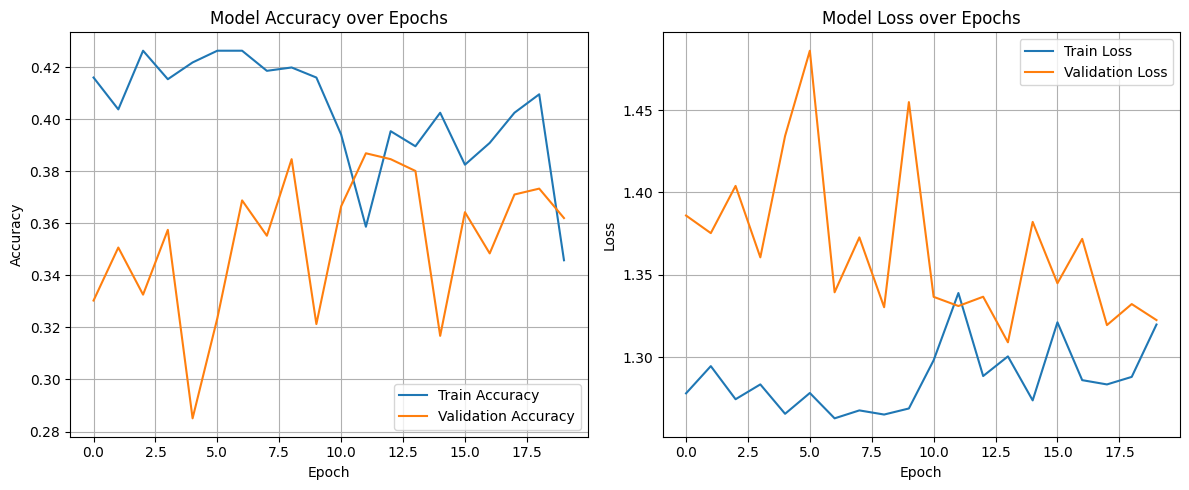

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

# Milestone 3

## import Dataset and Libraries

In [ ]:
import os
import gc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
                                     BatchNormalization)
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers, backend as K

## Data Loading and Preprocessing

In [ ]:
IMAGE_SIZE = (224, 224)
DATA_PATH = '/content/emotions_combined'
CLASS_FOLDERS = ['Angry', 'Happy', 'Sad', 'Neutral']
K_FOLDS = 4
EPOCHS = 20
BATCH_SIZE = 8
SEED = 42

X, y = [], []

for label_index, class_name in enumerate(CLASS_FOLDERS):
    folder_path = os.path.join(DATA_PATH, class_name)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        # Skip if it's a directory or not an image file
        if not os.path.isfile(img_path) or not img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        try:
            img = load_img(img_path, target_size=IMAGE_SIZE)
            img_array = img_to_array(img) / 255.0
            X.append(img_array)
            y.append(label_index)
        except Exception as e:
            print(f"Skipped {img_path}: {e}")

X = np.array(X, dtype=np.float32)
y = np.array(y)

print(f"Loaded {X.shape[0]} images across {len(CLASS_FOLDERS)} classes.")

Loaded 2125 images across 4 classes.


## Building the model (same as Milestone 2)

In [ ]:
def build_model():
    l2 = regularizers.l2(1e-4)
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=l2),
        MaxPooling2D((2, 2)), BatchNormalization(),

        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2),
        MaxPooling2D((2, 2)), BatchNormalization(),

        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2),
        MaxPooling2D((2, 2)), BatchNormalization(),

        Conv2D(32, (5, 5), activation='relu', kernel_regularizer=l2),
        MaxPooling2D((2, 2)), BatchNormalization(),

        Conv2D(16, (7, 7), activation='relu', kernel_regularizer=l2),
        MaxPooling2D((2, 2)),

        Dropout(0.30), Flatten(),
        Dense(64, activation='sigmoid'),
        Dense(len(CLASS_FOLDERS), activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


## K-Fold Splitting


--- Fold 1/4 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 Accuracy: 0.5677

--- Fold 2/4 ---
Fold 2 Accuracy: 0.6196

--- Fold 3/4 ---
Fold 3 Accuracy: 0.5989

--- Fold 4/4 ---
Fold 4 Accuracy: 0.5819

Fold Accuracies: [0.567669153213501, 0.6195856928825378, 0.598870038986206, 0.5819209218025208]
Average Accuracy: 0.5920


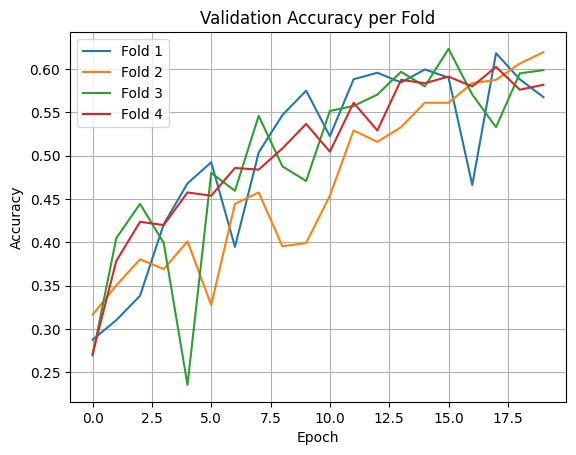

In [ ]:
kf = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42)
fold_accuracies = []
all_histories = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"\n--- Fold {fold + 1}/{K_FOLDS} ---")
    model = build_model()

    history = model.fit(X[train_idx], y[train_idx],
                        validation_data=(X[val_idx], y[val_idx]),
                        epochs=EPOCHS,
                        batch_size=BATCH_SIZE,
                        verbose=0)

    score = model.evaluate(X[val_idx], y[val_idx], verbose=0)
    print(f"Fold {fold+1} Accuracy: {score[1]:.4f}")
    fold_accuracies.append(score[1])
    all_histories.append(history.history['val_accuracy'])

    K.clear_session()
    del model
    gc.collect()

print("\nFold Accuracies:", fold_accuracies)
print(f"Average Accuracy: {np.mean(fold_accuracies):.4f}")

# Accuracy vs Epoch Plot
for i, acc in enumerate(all_histories):
    plt.plot(acc, label=f"Fold {i+1}")
plt.title("Validation Accuracy per Fold")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


## Confusion Matrix

Train: (1487, 224, 224, 3), Val: (425, 224, 224, 3), Test: (213, 224, 224, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step


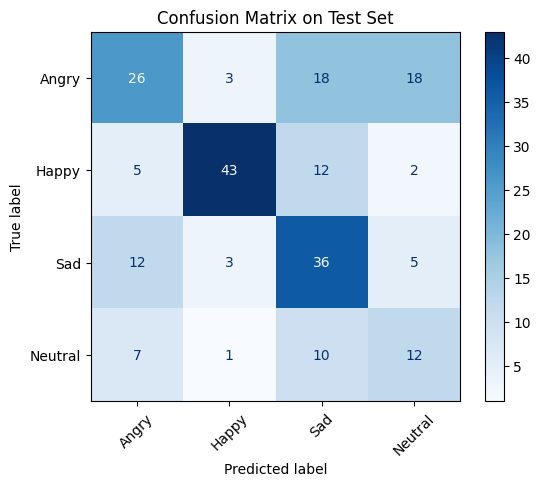

In [ ]:
# Split 10% test, rest for train+val
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=SEED)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.222, stratify=y_temp, random_state=SEED)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

model = build_model()
model.fit(X_train, y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=(X_val, y_val),
          verbose=0)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_FOLDERS)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix on Test Set')
plt.grid(False)
plt.show()


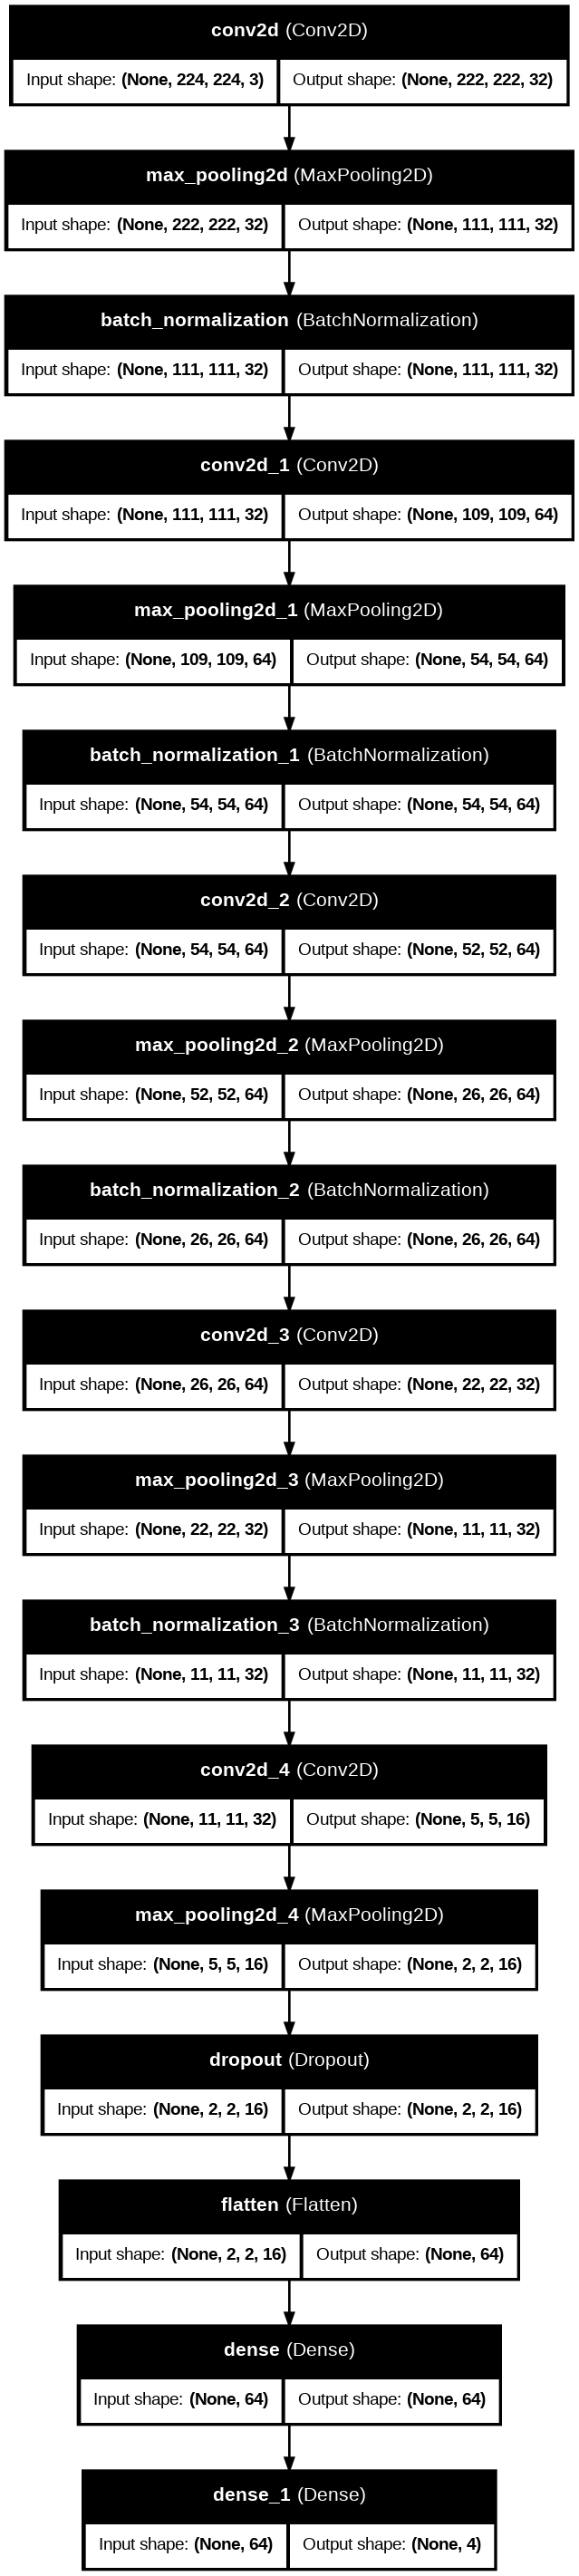

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="cnn_model.png", show_shapes=True, show_layer_names=True, dpi=96)
